# Economic Crisis Prediction

![](https://images.unsplash.com/photo-1622156522422-ab9355add7a1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1185&q=80)

In this project, I'm going to make a machine learning model that will be able to predict an economic crisis in Indonesia based on several variables. The sections on this project will be:

1. Data Cleansing & Preparation
2. Exploratory Data Analysis
3. Model Building 
4. Model Evaluation & Hyper Parameter Tuning

So, here we go!

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings('ignore')

**Load the Dataset**

In [2]:
df = pd.DataFrame(pd.read_csv('C:/Users/LENOVO/Downloads/data_ekonomi.csv', sep=';'))

In [27]:
df.head()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,0,1845.2,6068.2,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,1,2055.0,6259.1,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,4,1750.0,5767.5,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,5,1812.0,6392.7,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,6,2124.0,6615.6,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0


Because this dataset provided in Indonesian language, we will change the columns name into English.

In [29]:
df2=df.rename(columns={'Ekspor':'Export', 'Cadangan Devisa':'Foreign Exchange Reserve','IHSG':'Stock Index', 'Selisih Pinjaman dan Simpanan':'Loan and Savings Difference', \
                  'Suku Bunga Simpanan Riil':'Real Deposito Interest Rate', 'Selisih BI Rate Riil dan FED Rate Riil': \
                  'Real BI Rate and Real FED Rate Difference', 'Simpanan bank ': 'Bank Savings', 'Nilai Tukar Riil':\
                   'Real Exchange Rate', 'Nilai Tukar Perdagangan':'Trade Exchange Rate', 'M2/Cadangan Devisa': 'M2/Foreign Exchange Reserves', 'Krisis':'Crisis'})

df2.head()

,Id,Export,Foreign Exchange Reserve,Stock Index,Loan and Savings Difference,Real Deposito Interest Rate,Real BI Rate and Real FED Rate Difference,Bank Savings,Real Exchange Rate,Trade Exchange Rate,M1,M2/Foreign Exchange Reserves,M2M,Crisis
0,0,1845.2,6068.2,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,1,2055.0,6259.1,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,4,1750.0,5767.5,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,5,1812.0,6392.7,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,6,2124.0,6615.6,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0


## 1. Data Cleansing and Preparation

In this section, we will clean and prepare the data in order to make it clean from missing values, outliers, and wrong data types. The steps that will be conducted are below:
1. Check for duplicated data
2. Check for missing values and data types
3. Handling missing values
4. Handling outliers

**1. Check for duplicated data**

In [30]:
df2.duplicated().sum()

0

No duplicated data

**2. Check for missing values and data types**

In [31]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Id                                         270 non-null    int64  
 1   Export                                     270 non-null    float64
 2   Foreign Exchange Reserve                   270 non-null    float64
 3   Stock Index                                270 non-null    float64
 4   Loan and Savings Difference                270 non-null    float64
 5   Real Deposito Interest Rate                270 non-null    float64
 6   Real BI Rate and Real FED Rate Difference  270 non-null    float64
 7   Bank Savings                               270 non-null    float64
 8   Real Exchange Rate                         270 non-null    float64
 9   Trade Exchange Rate                        270 non-null    float64
 10  M1                        

**3. Handling missing values**

Because there is no missing values, we will pass this step.

**4. Handling outliers**

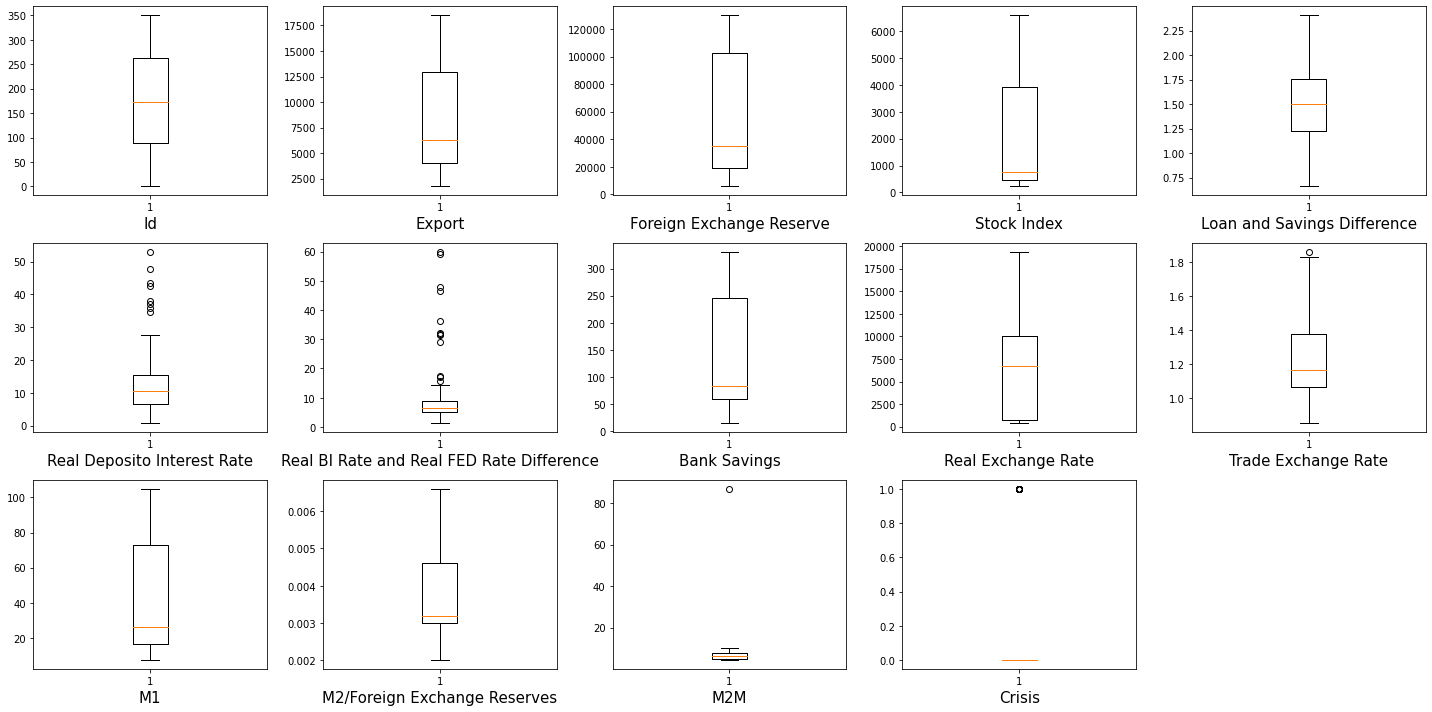

In [34]:
#Detecting outliers with boxplot 
cols = ['Id', 'Export', 'Foreign Exchange Reserve', 'Stock Index',
       'Loan and Savings Difference', 'Real Deposito Interest Rate',
       'Real BI Rate and Real FED Rate Difference', 'Bank Savings',
       'Real Exchange Rate', 'Trade Exchange Rate', 'M1',
       'M2/Foreign Exchange Reserves', 'M2M', 'Crisis']

plt.figure(figsize=(20,10))
for i,x in enumerate(cols):
    plt.subplot(3,5,(i+1))
    plt.boxplot(df2[x])
    plt.xlabel(x, fontsize=15)    
plt.tight_layout()

As we can see on the boxplot above, there are some outliers in our dataset. There are some ways to treat outliers, but in this case we will use the IQR method to detect and remove it. From the boxplot, we can see that 'Real Deposito Interest Rate' and 'Real BI Rate and Real FED Rate Difference' column contain the most number of outliers. Hence, we will use one of this column as removing criterion.

In [46]:
def remove_outlier_IQR(df2):
    Q1=df2['Real Deposito Interest Rate'].quantile(0.25)
    Q3=df2['Real Deposito Interest Rate'].quantile(0.75)
    IQR=Q3-Q1
    df_final=df2[~((df2['Real Deposito Interest Rate']<(Q1-1.5*IQR)) | (df2['Real Deposito Interest Rate']>(Q3+1.5*IQR)))]
    return df_final

In [52]:
df_final = remove_outlier_IQR(df2)
df_final.head()

,Id,Export,Foreign Exchange Reserve,Stock Index,Loan and Savings Difference,Real Deposito Interest Rate,Real BI Rate and Real FED Rate Difference,Bank Savings,Real Exchange Rate,Trade Exchange Rate,M1,M2/Foreign Exchange Reserves,M2M,Crisis
0,0,1845.2,6068.2,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,1,2055.0,6259.1,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,4,1750.0,5767.5,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,5,1812.0,6392.7,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,6,2124.0,6615.6,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0


## 2.  Exploratory Data Analysis

Before we go further on modelling, we have to find out some important points from this data. In order to do that, we will find the answer of these business questions:

1. How is each variable's correlation with the target (Crisis)?
2. How often does the crisis happen?
3. How does the 'Real Deposito Interest Rate' when a crisis happen?

**1. How is the each variable's correlation with the target (Crisis)?**

<AxesSubplot:>

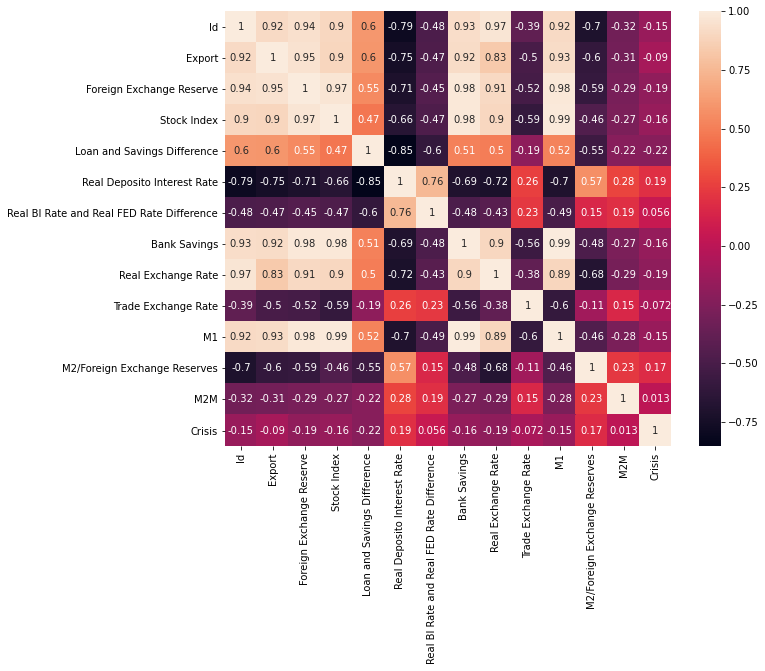

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final.corr(), annot=True)

From the heatmap above, we can see that there is no single variable that is strongly correlated with the target (crisis).

**2. How often does the crisis happen?**

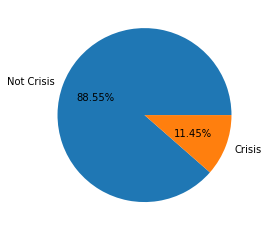

In [136]:
a = df_final['Crisis'].reset_index().groupby('Crisis').count()
plt.pie(x=a['index'] , labels = ['Not Crisis', 'Crisis'], autopct='%.2f%%');

From the dataset we have, 11,45% of the data having a crisis. In other words, we have about 1/8 chance of getting crisis.

**3. How does the 'Real Deposito Interest Rate' when a crisis happen?**

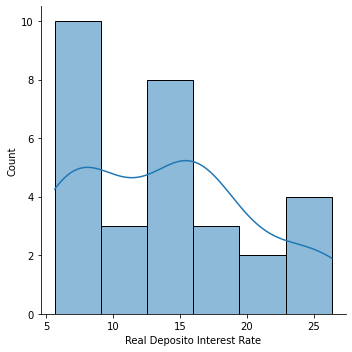

In [82]:
df_crisis = df_final[df_final['Crisis'] == 1]
sns.displot(df_crisis['Real Deposito Interest Rate'], kde=True)

As we can see from the histogam above, there is no certain level of interest rate when a crisis happened, which means a crisis may occur no matter how the Real Deposito Interest Rate is.

## 3. Model Building

In this section we will build the machine learning with several algorithm choosen. The steps on this section are:

1. Split Data Train and Data Test
2. Sampling review
3. Train the Model
4. Test The Model

**1. Split Data Train and Data Test**

In [138]:
from sklearn.model_selection import train_test_split

We drop the 'Crisis' column in x because it is the target, and we drop the 'Id' column because it is not necesary for modelling.

In [139]:
x = df_final.drop(columns=['Crisis', 'Id']) #The Features
y = df_final['Crisis'].reset_index(drop=True) #The Target

In [142]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = .20 ,random_state = 42)

**2. Sampling review**

0    185
1     24
Name: Crisis, dtype: int64


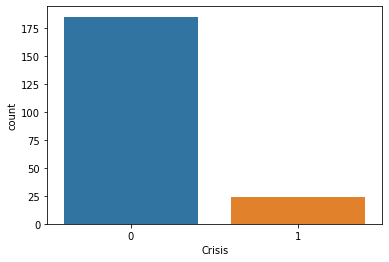

In [154]:
sns.countplot(y_train)
print(y_train.value_counts())

We see that the dataset we have is highly imbalance. There are 185 samples for not crisis and 24 samples for crisis. This extreme imbalance will influence the model's performance. Hence, we have to balancing the sample. In this case, we will use SMOTE method to balancing our sample. 

In [147]:
!pip install imblearn;

In [148]:
from imblearn.over_sampling import SMOTE

In [149]:
smote = SMOTE(sampling_strategy='minority',random_state = 42, k_neighbors=5)

In [150]:
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [151]:
y_smote.value_counts()

0    185
1    185
Name: Crisis, dtype: int64

Our sample is now balance

**3. Train the Model**

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [159]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
SVC = SVC()

In [160]:
LR.fit(x_smote, y_smote)
DT.fit(x_smote, y_smote)
RF.fit(x_smote, y_smote)
KNN.fit(x_smote, y_smote)
SVC.fit(x_smote, y_smote)

SVC()

**4. Test the Model**

In [162]:
y_pred_lr = LR.predict(x_test)
y_pred_dt= DT.predict(x_test)
y_pred_rf= RF.predict(x_test)
y_pred_knn= KNN.predict(x_test)
y_pred_svc= SVC.predict(x_test)

## 4. Model Evaluation

**Logistic Regression**

In [163]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

In [177]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90        47
           1       0.38      0.83      0.53         6

    accuracy                           0.83        53
   macro avg       0.68      0.83      0.71        53
weighted avg       0.91      0.83      0.85        53



Text(33.0, 0.5, 'Actual Label')

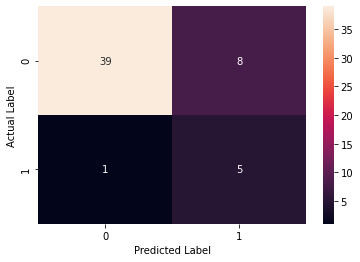

In [178]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

**Decision Tree**

In [166]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.83      0.91         6

    accuracy                           0.98        53
   macro avg       0.99      0.92      0.95        53
weighted avg       0.98      0.98      0.98        53



Text(33.0, 0.5, 'Actual Label')

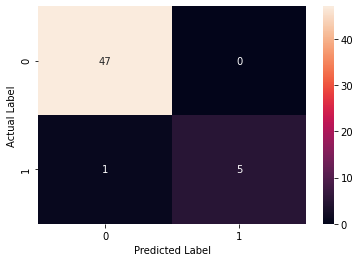

In [167]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

**Random Forest**

In [168]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00         6

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



Text(33.0, 0.5, 'Actual Label')

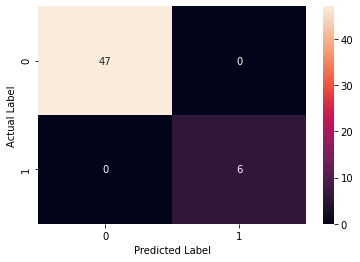

In [169]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

**K-Nearest Neighbors**

In [172]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.75      1.00      0.86         6

    accuracy                           0.96        53
   macro avg       0.88      0.98      0.92        53
weighted avg       0.97      0.96      0.96        53



Text(33.0, 0.5, 'Actual Label')

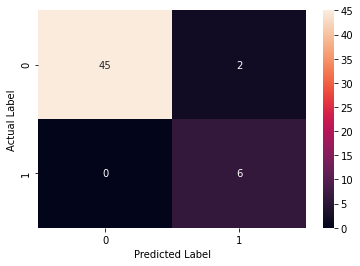

In [173]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

**Support Vector Machine**

In [175]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        47
           1       0.17      1.00      0.29         6

    accuracy                           0.45        53
   macro avg       0.59      0.69      0.42        53
weighted avg       0.91      0.45      0.52        53



Text(33.0, 0.5, 'Actual Label')

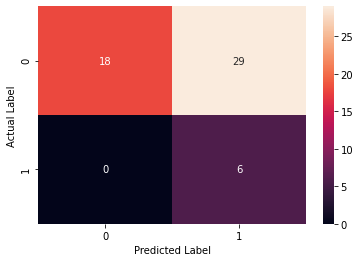

In [176]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

From all evaluation test conducted, Decision Tree and Random Forest performs similarly well. But if we see the classification report and confusion matrix of both of two algorithms, we can clearly see that both of them is overfitting. Hence we choose the Logistic Regression instead for our machine learning algorithm because it has a quite good performance (83% accuracy) but it is not overfitting.

# Conclusion & Suggestions

In this project, i get a quite satisfying machine learning model with Logistic Regression algorithm which provide 83% of accuracy. Nevertheless, there are many things that can be done in order to optimize the model's performance such as data scalling, hyperparameter tuning, and feature engineering.